In [41]:
%matplotlib inline
from kbmodpy import kbmod as kb
import numpy as np
import matplotlib.pyplot as plt

In [42]:
p = kb.psf(1.5)
imcount = 20
image_dim = 2000
noise = 10
object_flux = 150.0
object_x = 100.7
object_y = 150.3
object_xv = 50
object_yv = 35
imlist =  []
for i in range(imcount):
    imlist.append(kb.layered_image(
        "t"+str(i), 1000, 1000, noise, noise*noise, i/imcount))

In [43]:
for im in imlist:
    im.add_object(object_x+im.get_time()*object_xv, object_y+im.get_time()*object_yv, object_flux, p)

In [44]:
stack = kb.image_stack(imlist)
del imlist

In [45]:
search = kb.stack_search(stack, p)
del stack
search.set_debug(True)

In [46]:
use_regions = False

In [47]:
if use_regions:
   results = search.region_search(55, 30, 15, 9.0, 10)
else:
   search.gpu( 80, 80, 0.2, 1.0, 50, 75, 10 )
   results = search.get_results(0, 10)


In [48]:
results

[lh: 12.448515 flux: 150.862930 x: 100 y: 150 x_v: 51.154785 y_v: 34.250973 obs_count: 20,
 lh: 12.403520 flux: 150.317642 x: 100 y: 150 x_v: 51.067642 y_v: 34.937252 obs_count: 20,
 lh: 12.358403 flux: 149.770874 x: 100 y: 150 x_v: 50.809727 y_v: 34.760799 obs_count: 20,
 lh: 12.297045 flux: 149.027267 x: 100 y: 150 x_v: 50.895119 y_v: 34.077110 obs_count: 20,
 lh: 12.254216 flux: 148.508240 x: 99 y: 150 x_v: 53.063099 y_v: 34.765266 obs_count: 20,
 lh: 12.216664 flux: 148.053162 x: 99 y: 150 x_v: 53.145000 y_v: 34.064274 obs_count: 20,
 lh: 12.187165 flux: 147.695663 x: 99 y: 150 x_v: 53.408092 y_v: 34.232906 obs_count: 20,
 lh: 12.179210 flux: 147.599243 x: 99 y: 150 x_v: 52.278915 y_v: 34.251495 obs_count: 20,
 lh: 12.046750 flux: 145.993973 x: 101 y: 150 x_v: 49.778057 y_v: 34.054996 obs_count: 20,
 lh: 12.003528 flux: 145.470169 x: 101 y: 150 x_v: 49.947300 y_v: 34.909111 obs_count: 20]

In [49]:
stamps = search.sci_stamps(results[0], 10)

Starting at 0


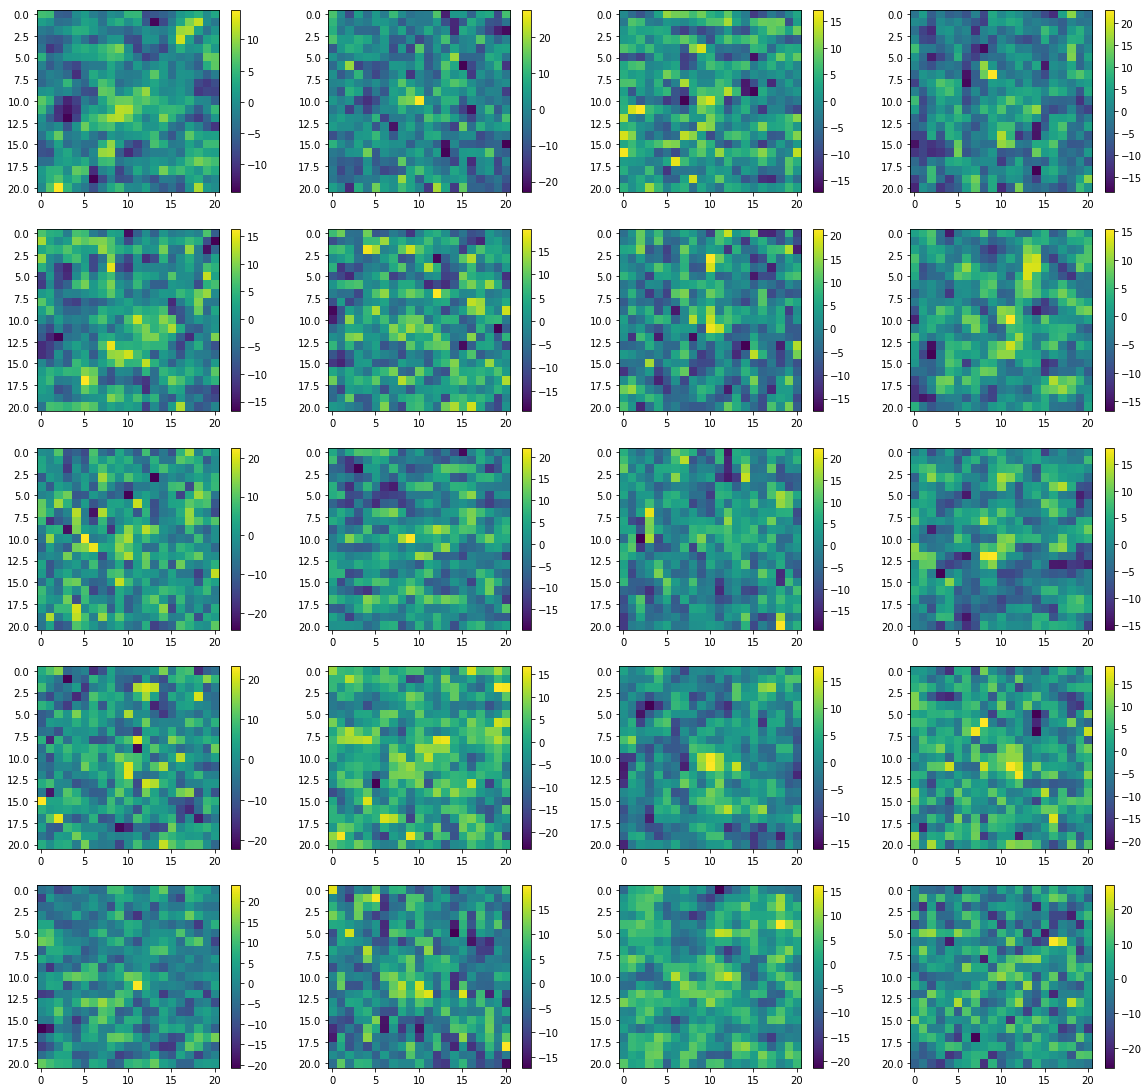

In [50]:
fig = plt.figure(figsize=(20, 100))
set_on = 1
plot_count = len(stamps)
print ('Starting at %i' % int((set_on - 1)*plot_count))
for i in range((set_on-1)*plot_count,set_on*plot_count):
    fig.add_subplot(25,4,i-(set_on-1)*plot_count+1)
    plt.imshow(stamps[i], #cmap=plt.cm.Greys_r, 
               interpolation=None)
    plt.colorbar()

In [51]:
psis, phis = search.lightcurve(results[0])

In [52]:
psis

array([[ 0.05029887],
       [ 0.05907924],
       [ 0.04304526],
       [ 0.04154528],
       [ 0.02887419],
       [ 0.04589156],
       [ 0.06600003],
       [ 0.01889758],
       [ 0.05403751],
       [ 0.05044653],
       [ 0.03929442],
       [ 0.04822216],
       [ 0.04854149],
       [ 0.0476515 ],
       [ 0.065957  ],
       [ 0.05875951],
       [ 0.0436781 ],
       [ 0.05813097],
       [ 0.03688234],
       [ 0.04914508]], dtype=float32)

In [53]:
#plt.figure(figsize=[12,12])
###imlist[0].convolve(p)
#plt.imshow(imlist[0].science())
#plt.gca().invert_yaxis()
#plt.colorbar()

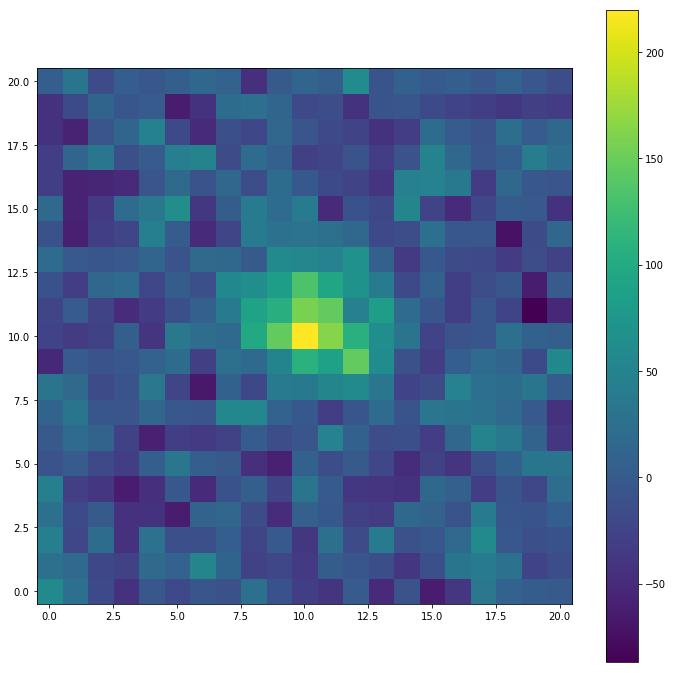

In [54]:
stacked = np.sum(np.array(s) for s in stamps)
plt.figure(figsize=[12,12])
plt.imshow(stacked)
plt.gca().invert_yaxis()
plt.colorbar()